In [1]:
import altair as alt
import numpy as np
import pandas as pd


pd.set_option('display.max_columns', None)
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## Get health data

In [2]:
df = pd.read_csv("../data/WHO_life_expectancy_data_clean.csv")

In [3]:
df.head()

,Unnamed: 0,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Make Life Expectancy vs. GDP Plot

In [4]:
def make_plot_gdp_vs_life(df, x, colour, year_range=None):
    """Creates an Altair scatter plot
    
    Arguments:
        df {pd.DataFrame} -- Data frame containing the shaded values to plot and country information
        x {str} -- The column to plot the x axis on
        colour {str} -- The column to plot colour scale by (should be either: "life_expectancy", "gdp", or "gdp_log")
        year_range {list} -- List of length 2 containing year range (for example: `[2012, 2015]`) (default: {None}) 
    
    Returns:
        altair.vegalite.v3.api.Chart
    """
    
    ##################################
    # Clean and tidy data frame
    ##################################
        
    # filter on year range
    if year_range != None:
        df = df[(df["year"] >= year_range[0]) & (df["year"] <= year_range[1])]
        
    # aggregate and tidy data
    df = (
        df.loc[:, ["country", "status", "life_expectancy", "gdp"]].groupby(["country", "status"])
          .agg("mean")
          .reset_index()
    )
    df["gdp_log"] = np.log(df["gdp"])
    
    ##################################
    # CREATE PLOT
    ##################################

    
    # create plot
    if x == "gdp":
        x_title = "GDP (USD)"
    else:
        x_title = "GDP log (USD)"
    if colour == "status":
        colour_title = "Status"
    else:
        colour_title = "Country"
        
    fig = alt.Chart(df).mark_point(
        opacity=1/2
    ).encode(
        alt.X(x + ":Q", title=x_title),
        alt.Y("life_expectancy:Q", bin=alt.Bin(step=2), title="Life Expectancy"),
        alt.Color(colour + ":N", title=colour_title),
        tooltip=[
                alt.Tooltip("country", title="Country"),
                alt.Tooltip("status", title="Status"),
                alt.Tooltip("gdp:Q", title="GDP (USD)", format="$0,.2f"),
                alt.Tooltip("gdp_log:Q", title="GDP log (USD)", format="$0,.2f")
            ]
    )
    
    return fig

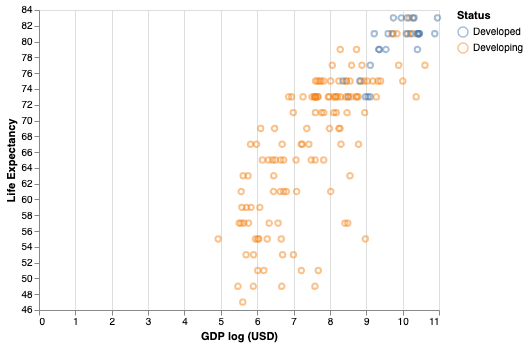

In [5]:
make_plot_gdp_vs_life(df, "gdp_log", "status", [2000, 2015])